In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Training_Data = pd.read_csv("train.csv")
sublocal = pd.read_csv("sampleSubLocal.csv")
sampleSub = pd.read_csv("SampleSubmission.csv")
Training_Data.head(2)

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20


In [3]:
#Training_Data.shape

In [4]:
#sublocal.tail(2)

In [5]:
sampleSub.tail(1)

,Territory X Date,target
19645,Zimbabwe X 06/07/20,0


In [6]:
train = pd.read_csv("train.csv")
train.head(1)

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20


In [27]:
train.isnull().sum()

cases    0
Date     0
dtype: int64

In [7]:
train.drop(['Territory','Territory X Date','target'],inplace=True,axis=1)
train.head(2)

,cases,Date
0,0,1/22/20
1,0,1/23/20


In [8]:
train['cases'].dtype

dtype('int64')

In [9]:
train['cases'] = train['cases'].astype(float)

In [10]:
#Passing string to detect time type
train['Date'] = pd.to_datetime(train['Date'],infer_datetime_format = True)
trainIndexed = train.set_index(['Date'])

from datetime import datetime
trainIndexed.head(2)

,cases
Date,
2020-01-22,0.0
2020-01-23,0.0


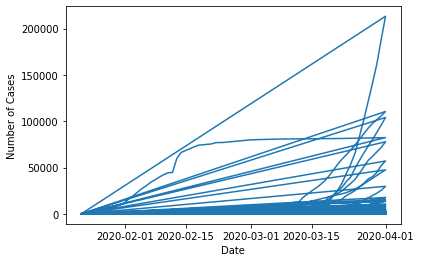

In [11]:
#Plotting Graphs
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.plot(trainIndexed)

In [12]:
#Calculating rolling statistics
rolingMean = trainIndexed.rolling(window=365).mean()
rolingStd = trainIndexed.rolling(window=365).std()
print(rolingMean, rolingStd)

                cases
Date                 
2020-01-22        NaN
2020-01-23        NaN
2020-01-24        NaN
2020-01-25        NaN
2020-01-26        NaN
...               ...
2020-03-28  13.282192
2020-03-29  13.301370
2020-03-30  13.320548
2020-03-31  13.342466
2020-04-01  13.364384

[14839 rows x 1 columns]                 cases
Date                 
2020-01-22        NaN
2020-01-23        NaN
2020-01-24        NaN
2020-01-25        NaN
2020-01-26        NaN
...               ...
2020-03-28  35.632277
2020-03-29  35.626992
2020-03-30  35.621696
2020-03-31  35.615938
2020-04-01  35.610166

[14839 rows x 1 columns]


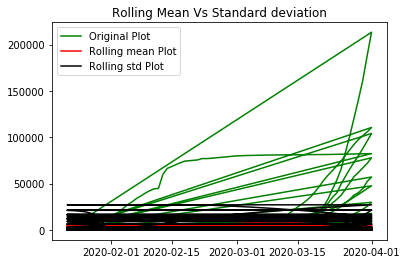

In [13]:
#plotting rolling statistics
original = plt.plot(trainIndexed, color = 'Green', label = 'Original Plot')
Average = plt.plot(rolingMean, color = 'red', label = 'Rolling mean Plot')
std = plt.plot(rolingStd, color = 'black', label = 'Rolling std Plot')
plt.legend(loc = 'best')
plt.title('Rolling Mean Vs Standard deviation')
plt.show(block=False)


In [14]:
#Applying Dickey fuller test to check on stationarity

from statsmodels.tsa.stattools import adfuller

print('Results of the Dickey Fuller test: ')

dkFtest = adfuller(trainIndexed['cases'], autolag ="AIC")
dkOutput = pd.Series(dkFtest[0:4], index=['Test statistics','p.value','lags used','Number of observations used'])

for key,value in dkFtest[4].items():
    dkOutput['Critical value(%s)' %key] = value
    
print(dkOutput)
    

Results of the Dickey Fuller test: 
Test statistics                  -22.772606
p.value                            0.000000
lags used                          0.000000
Number of observations used    14838.000000
Critical value(1%)                -3.430791
Critical value(5%)                -2.861735
Critical value(10%)               -2.566874
dtype: float64


C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


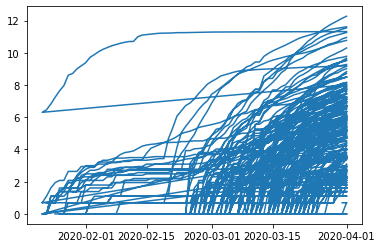

In [15]:
#We now estimate trend

trainIndexed_logscale = np.log(trainIndexed)
plt.plot(trainIndexed_logscale)

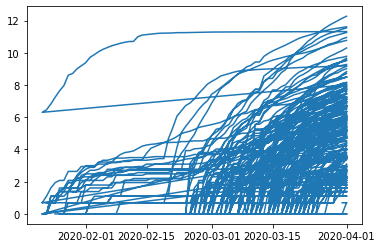

In [16]:
#moving average

movingAverage = trainIndexed_logscale.rolling(window = 365).mean()
movingSTD = trainIndexed_logscale.rolling(window = 365).std()
plt.plot(trainIndexed_logscale)
plt.plot(movingAverage, color= 'red')

In [47]:
#mvDifference, difference between data logscale and moving average
mvDifference = trainIndexed_logscale - movingAverage
mvDifference.head()

,cases
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,NaN
2020-01-26,NaN


In [62]:
#Removing Nan values
mvDifference.dropna(inplace =  True)
mvDifference.head(20)

#Replacing and removing inf
train[train.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] #.astype(np.float64) ?
#train.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,cases,Date
0,0.0,2020-01-22
1,0.0,2020-01-23
2,0.0,2020-01-24
3,0.0,2020-01-25
4,0.0,2020-01-26
...,...,...
14834,7.0,2020-03-28
14835,7.0,2020-03-29
14836,7.0,2020-03-30
14837,8.0,2020-03-31


In [63]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries):
    
    #determining rolling statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window=365).std()
    
    #plot rolling statistics
    original = plt.plot(timeseries, color='Green',label='original')
    mean = plt.plot(movingAverage, color='red',label='Rolling mean')
    std = plt.plot(movingSTD, color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard deviation')
    plt.show(block = False)
    
    #Repeating Dickey fuller test

    print('Results of the Dickey Fuller tesr: ')

    dkFtest = adfuller(trainIndexed['cases'], autolag ="AIC")
    dkOutput = pd.Series(dkFtest[0:4], index=['Test statistics','p.value','lags used','Number of observations used'])

    for key,value in dkFtest[4].items():
        dkOutput['Critical value(%s)' %key] = value
    
    print(dkOutput)


    

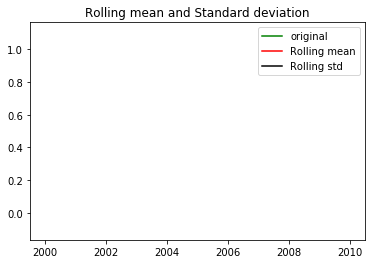

Results of the Dickey Fuller tesr: 
Test statistics                  -22.772606
p.value                            0.000000
lags used                          0.000000
Number of observations used    14838.000000
Critical value(1%)                -3.430791
Critical value(5%)                -2.861735
Critical value(10%)               -2.566874
dtype: float64


In [64]:
stationarity_test(mvDifference)

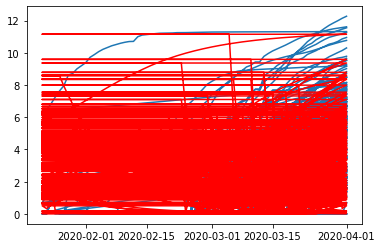

In [65]:
"""Calculating weighted average of time series to see the trends present in the time series"""

exponentialDecayWeightAv = trainIndexed_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(trainIndexed_logscale)
plt.plot(exponentialDecayWeightAv, color='red')

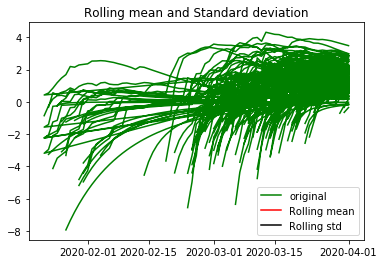

Results of the Dickey Fuller tesr: 
Test statistics                  -22.772606
p.value                            0.000000
lags used                          0.000000
Number of observations used    14838.000000
Critical value(1%)                -3.430791
Critical value(5%)                -2.861735
Critical value(10%)               -2.566874
dtype: float64


In [66]:
datalogscalMinusMovingexponentialDecayWeightAv =trainIndexed_logscale - exponentialDecayWeightAv 
stationarity_test(datalogscalMinusMovingexponentialDecayWeightAv)

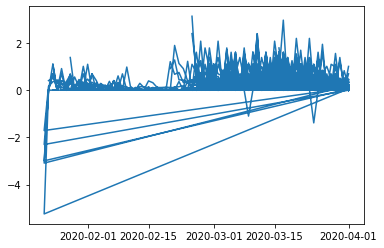

In [67]:
"""shifting values to time series for forecasting"""
dataLogDifShifting = trainIndexed_logscale - trainIndexed_logscale.shift()
plt.plot(dataLogDifShifting)

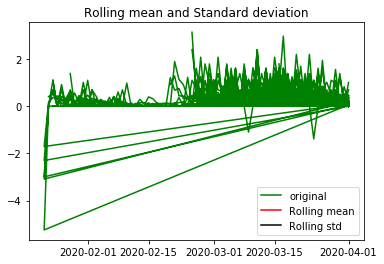

Results of the Dickey Fuller tesr: 
Test statistics                  -22.772606
p.value                            0.000000
lags used                          0.000000
Number of observations used    14838.000000
Critical value(1%)                -3.430791
Critical value(5%)                -2.861735
Critical value(10%)               -2.566874
dtype: float64


In [68]:
dataLogDifShifting.dropna(inplace = True)
stationarity_test(dataLogDifShifting)

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(trainIndexed_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(trainIndexed_logscale, label = 'Original')
plt.legend(loc = best)
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplots(413)
plt.plot(seasonal,label = 'seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogdata.dropna(inplace=True)
test_stationarity(decomposedLogData)


ValueError: This function does not handle missing values

In [44]:
#ACF(autocorelative ) and PACF(partial autocorelative)

from statsmodels.tsa.stattools import acf, pacf

acfLag = acf(dataLogDifShifting, nlags = 20)
pacflag = pacf(dataLogDifShifting, nlags = 20, method = 'ols')

#Now lets plot acf
plt.subplots(121)
plt.plot(acfLag)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDifShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDifShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#ploting pacf
plt.subplot(122)
plt.plot(pacfLag)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDifShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDifShifting)),linestyle='--',color='gray')
plt.title('partial autocorelation function')
plt.tight_layout()


C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


LinAlgError: SVD did not converge in Linear Least Squares

In [72]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(trainIndexed_logscale, order = (2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(dataLogDifShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataLogDifShifting["cases"])**2))
print('Plotting AR model')

    

C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\numpy\lib\function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\U

MissingDataError: exog contains inf or nans

In [51]:
#MA model
model = ARIMA(trainIndexed_logscale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dataLogDifShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataLogDifShifting['cases'])**2))
print('Plotting AR model')

C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\numpy\lib\function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\U

LinAlgError: Array must not contain infs or NaNs

In [73]:
model = ARIMA(trainIndexed_logscale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDifShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataLogDifShifting['cases'])**2))


C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SAMURAI\.conda\envs\TensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will b

MissingDataError: exog contains inf or nans

In [53]:
predictionARIMAdiff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictionARIMAdiff.head())

NameError: name 'results_ARIMA' is not defined

In [54]:
#Converting to cumulative sum
predictionsARIMAdiffcumsum=predictionARIMAdiff.cumsum()
print(predictionsARIMAdiffcumsum.head())

NameError: name 'predictionARIMAdiff' is not defined

In [55]:
predictionsARIMAlog = pd.Series(trainIndexed_logscale['cases'].ix[0],index=trainIndexed_logscale.index)
predictionsARIMAlog = predictionsARIMAlog.add(predictionsARIMAdiffcumsum,fill_value=0)
predictionsARIMAlog.head()

AttributeError: 'Series' object has no attribute 'ix'

In [56]:
predictionsARIMA=np.exp(predictionsARIMAlog)
plt.plot(trainIndexed)
plt.plot(predictionsARIMA)

NameError: name 'predictionsARIMAlog' is not defined

In [57]:
trainIndexed_logscale

,cases
Date,
2020-01-22,-inf
2020-01-23,-inf
2020-01-24,-inf
2020-01-25,-inf
2020-01-26,-inf
...,...
2020-03-28,1.945910
2020-03-29,1.945910
2020-03-30,1.945910


In [58]:
#results ARIMA plot
#results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps = 120)

NameError: name 'results_ARIMA' is not defined

In [59]:
x[1]

NameError: name 'x' is not defined

In [60]:
len(x[1])

NameError: name 'x' is not defined

In [61]:
np.exp(x[1])

NameError: name 'x' is not defined